### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing Dataset already uploaded to ANACONDA cloud
df_raw = pd.read_csv('Country-data.csv')

In [4]:
df = df_raw
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

### Checking for Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### `Observation`
- None of the rows have missing values

- All variables are int64/float64 excluding country, no categorical variables

- *No Data Preparation or Dummy variable creation is required for the columns in this dataset*

### Data Description

In [7]:
#Checking outliers for ciontinuous variables
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### Scaling the Data

In [8]:
# to be removed before submitting
df = pd.read_csv('Country-data.csv')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
y= df.pop('country')

In [12]:
X = df.copy()

In [13]:
x = scaler.fit_transform(X)

In [14]:
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(svd_solver = 'randomized', random_state=42)

In [17]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [19]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

<BarContainer object of 9 artists>

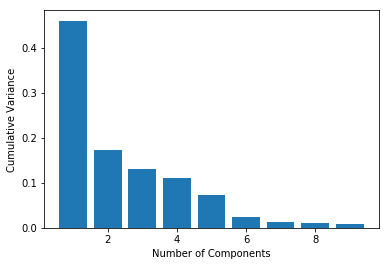

In [20]:
plt.ylabel('Cumulative Variance')
plt.xlabel('Number of Components')
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

### Making the Scree Plot

Text(0, 0.5, 'Number of Components')

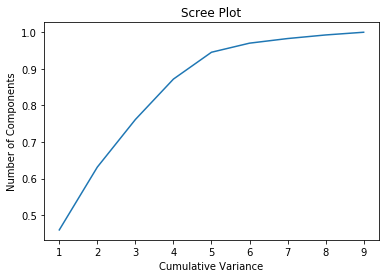

In [22]:
plt.plot(range(1,(len(var_cumu)+1)),var_cumu)
plt.title('Scree Plot')
plt.xlabel('Cumulative Variance')
plt.ylabel('Number of Components')

`The graph starts flattening after 5 components, contributing to almost 95% variance`

### Creating a PCA with 5 components

In [23]:
from sklearn.decomposition import IncrementalPCA

In [24]:
pc5 = PCA(n_components = 5, random_state=42)

In [25]:
df_pc5 = pc5.fit_transform(x)

In [26]:
df_pc5.shape

(167, 5)

In [27]:
df_pc5[:10]

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465],
       [-2.93242265,  1.69555507,  1.52504374,  0.83962501, -0.27320893],
       [ 1.03357587,  0.13665871, -0.22572092, -0.84706269, -0.19300696],
       [ 0.02240726, -1.77918658,  0.86999712, -0.03696687,  0.98105651],
       [-0.10158374, -0.56825172,  0.24209182, -1.46626576, -0.05599243],
       [ 2.34216461, -1.98845915,  0.19034419,  1.10503778, -0.73119233],
       [ 2.97376366, -0.73468866, -0.51976636,  1.2054421 ,  0.08357971],
       [-0.181487  , -0.40286587,  0.86745874, -0.43877298,  0.13735047]])

### Making a dataframe out of it for convinience

In [28]:
df5 = pd.DataFrame(df_pc5, columns=['PC1','PC2','PC3','PC4','PC5'])

In [29]:
df5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [30]:
df5_final = pd.concat([df5,y], axis=1)

In [31]:
df5_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


### Let's perfrom Outlier treatment

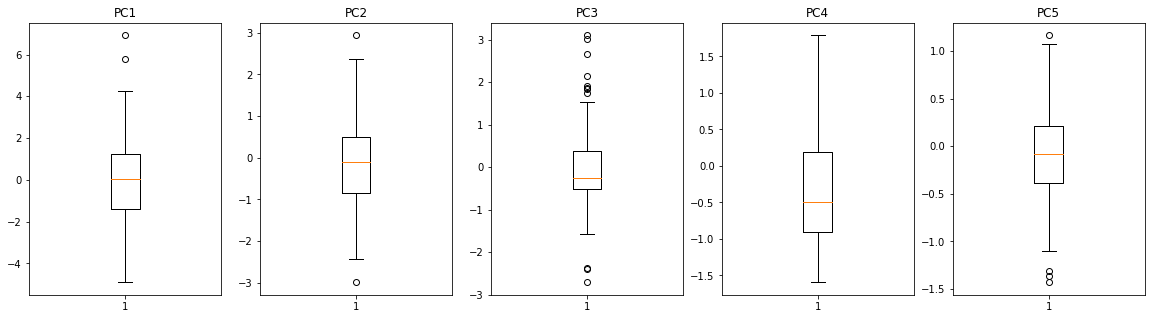

In [32]:
plt.figure(figsize=(20,5))
# For PC1
plt.subplot(1,5,1)
plt.title('PC1')
plt.boxplot(df5_final.PC1)

Q1 = df5_final.PC1.quantile(0.05)
Q3 = df5_final.PC1.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC1>=Q1) & (df5_final.PC1<=Q3)]

# For PC2
plt.subplot(1,5,2)
plt.title('PC2')
plt.boxplot(df5_final.PC2)

Q1 = df5_final.PC2.quantile(0.05)
Q3 = df5_final.PC2.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC2>=Q1) & (df5_final.PC2<=Q3)]


# For PC3
plt.subplot(1,5,3)
plt.title('PC3')
plt.boxplot(df5_final.PC3)

Q1 = df5_final.PC3.quantile(0.05)
Q3 = df5_final.PC3.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC3>=Q1) & (df5_final.PC3<=Q3)]


# For PC4
plt.subplot(1,5,4)
plt.title('PC4')
plt.boxplot(df5_final.PC4)

Q1 = df5_final.PC4.quantile(0.05)
Q3 = df5_final.PC4.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC4>=Q1) & (df5_final.PC4<=Q3)]


# For PC5
plt.subplot(1,5,5)
plt.title('PC5')
plt.boxplot(df5_final.PC5)

Q1 = df5_final.PC5.quantile(0.05)
Q3 = df5_final.PC5.quantile(0.95)
IQR = Q3-Q1
df5_final = df5_final[(df5_final.PC5>=Q1) & (df5_final.PC5<=Q3)]

### Clustering - Calculating the Hopkins statistic

In [33]:
### Clustering - Calculating the Hopkins statistic#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(df5_final.drop('country', axis =1))

0.6223197794960361

In [35]:
df6_final = df5_final.drop('country', axis = 1)

# K-Means Clustering

### Look at the silhouette score plot and choose the optimal number of cluster

In [36]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df6_final)
    ss.append([k,silhouette_score(df6_final, kmeans.labels_)])

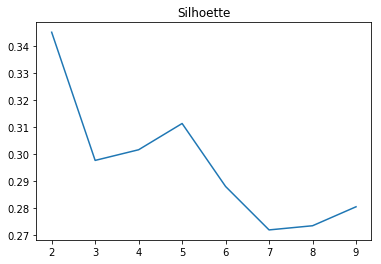

In [37]:
plt.title('Silhoette')
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

###  Look at the Elbow Curve plot and choose the optimal number of cluster

In [38]:
#Now let's proceed to the elbow curve method
from sklearn.metrics import silhouette_score

ssd = []
for k in range(1,10):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df6_final)
    ssd.append([model.inertia_])

print(ssd)

[[361.44932719841825], [205.69953408110982], [150.36072321413917], [121.96442342426424], [101.45042242580946], [89.06594130377206], [79.74089595359506], [73.58928674684128], [67.72275709612157]]


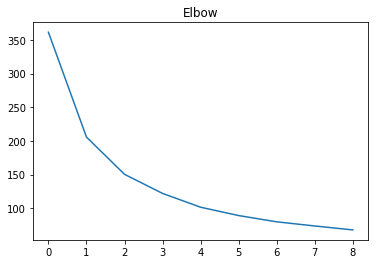

In [39]:
plt.title('Elbow')
plt.plot(ssd)

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df6_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df6_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.34899639114031117
For n_clusters=3, the silhouette score is 0.29759042173755124
For n_clusters=4, the silhouette score is 0.2991889170648883
For n_clusters=5, the silhouette score is 0.3094589726844466
For n_clusters=6, the silhouette score is 0.28980082767634086
For n_clusters=7, the silhouette score is 0.2770210020929659
For n_clusters=8, the silhouette score is 0.26223409258619257


## KMeans with the K the we have choosed = 3

In [41]:
#Let's perform K means using K=
model_clus2 = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
model_clus2.fit(df6_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [42]:
# Let's add the cluster Ids to the PCs data 

dat_km = pd.concat([df5_final.reset_index().drop('index', axis=1), pd.Series(model_clus2.labels_)], axis =1)

In [43]:
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,country,0
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan,2
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria,0
3,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda,1
4,-0.181487,-0.402866,0.867459,-0.438773,0.137350,Azerbaijan,0


In [44]:
dat_km.columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'country','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan,2
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria,0
3,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda,1
4,-0.181487,-0.402866,0.867459,-0.438773,0.137350,Azerbaijan,0


In [45]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts()

0    39
1    32
2    24
Name: ClusterID, dtype: int64

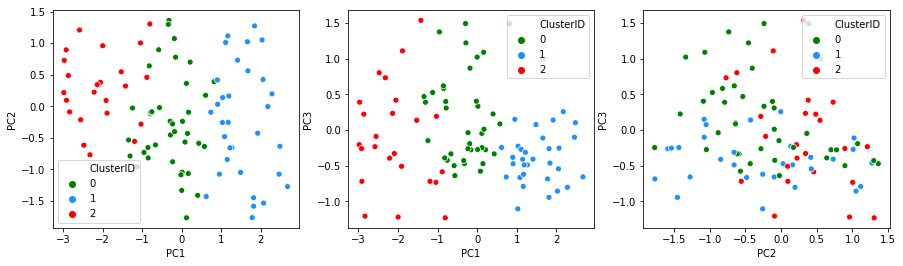

In [46]:
# Plot the Cluster with respect to the clusters obtained

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y ='PC2', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y ='PC3', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)
plt.subplot(1,3,3)
sns.scatterplot(x='PC2', y ='PC3', hue = 'ClusterID', palette=['green','dodgerblue','red'], legend='full', data = dat_km)


### Cluster Profiling

In [47]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(df_raw, dat_km, how = 'inner', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,-0.181487,-0.402866,0.867459,-0.438773,0.137350,0


In [48]:
dat5.shape

(95, 16)

In [49]:
dat6 = dat5[['country','child_mort', 'income','gdpp', 'PC1', 'PC2', 'ClusterID']]

In [50]:
dat6.groupby('ClusterID').count()

,country,child_mort,income,gdpp,PC1,PC2
ClusterID,,,,,,
0,39,39,39,39,39,39
1,32,32,32,32,32,32
2,24,24,24,24,24,24


In [51]:
child_mort = dat6.groupby(['ClusterID']).child_mort.mean()
income = dat6.groupby(['ClusterID']).income.mean()
gdpp = dat6.groupby(['ClusterID']).gdpp.mean()

In [52]:
final_df = pd.concat([child_mort, income, gdpp], axis = 1)

In [53]:
final_df

,child_mort,income,gdpp
ClusterID,,,
0,28.548718,9443.589744,4332.153846
1,7.600000,24359.375000,19503.125000
2,74.633333,4249.916667,2013.416667


### K-Means Suggestion
- Countries in Cluster 2 have an average child mortality 90, 90/1000 child die before the age of 5
- Countries in Cluster 2 have an average gdpp of 553 which is very low compared to clusters 0 & 1
- Countries in Cluster 2 have an average income of 1600 which is very low compared to clusters 0 & 1

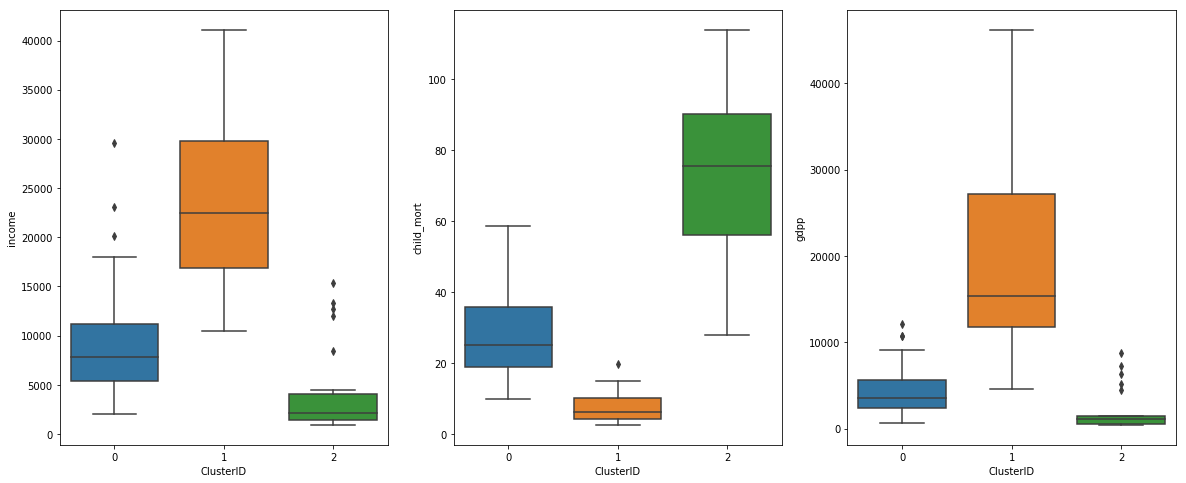

In [54]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(x='ClusterID', y='income', data=dat6)

plt.subplot(1,3,2)
sns.boxplot(x='ClusterID', y='child_mort', data=dat6)

plt.subplot(1,3,3)
sns.boxplot(x='ClusterID', y='gdpp', data=dat6)

In [55]:
# List of Countries which need Attention.

dat6[dat6['ClusterID']==2]['country']

0         Afghanistan
12           Botswana
17            Comoros
18      Cote d'Ivoire
26            Eritrea
30              Gabon
31             Gambia
33              Ghana
37             Guinea
38      Guinea-Bissau
45               Iraq
50                Lao
56         Madagascar
57             Malawi
62         Mozambique
63            Namibia
75            Senegal
78    Solomon Islands
79       South Africa
81              Sudan
84           Tanzania
85               Togo
93              Yemen
94             Zambia
Name: country, dtype: object

# Hierarchical Clustering

In [56]:
rfm_df = df[['child_mort', 'income','gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 3)

In [57]:
rfm_df_scaled[:10]

array([[ 1.29153238, -0.8082454 , -0.67917961],
       [-0.5389489 , -0.3753689 , -0.48562324],
       [-0.27283273, -0.22084447, -0.46537561],
       [ 2.00780766, -0.58504345, -0.51626829],
       [-0.69563412,  0.10173177, -0.04181713],
       [-0.5911773 ,  0.0809204 , -0.14579144],
       [-0.50164289, -0.54342071, -0.53323252],
       [-0.8324228 ,  1.26196568,  2.13069856],
       [-0.84485813,  1.35561685,  1.85708197],
       [ 0.02312823, -0.05955635, -0.38985743]])

### Single Linkage

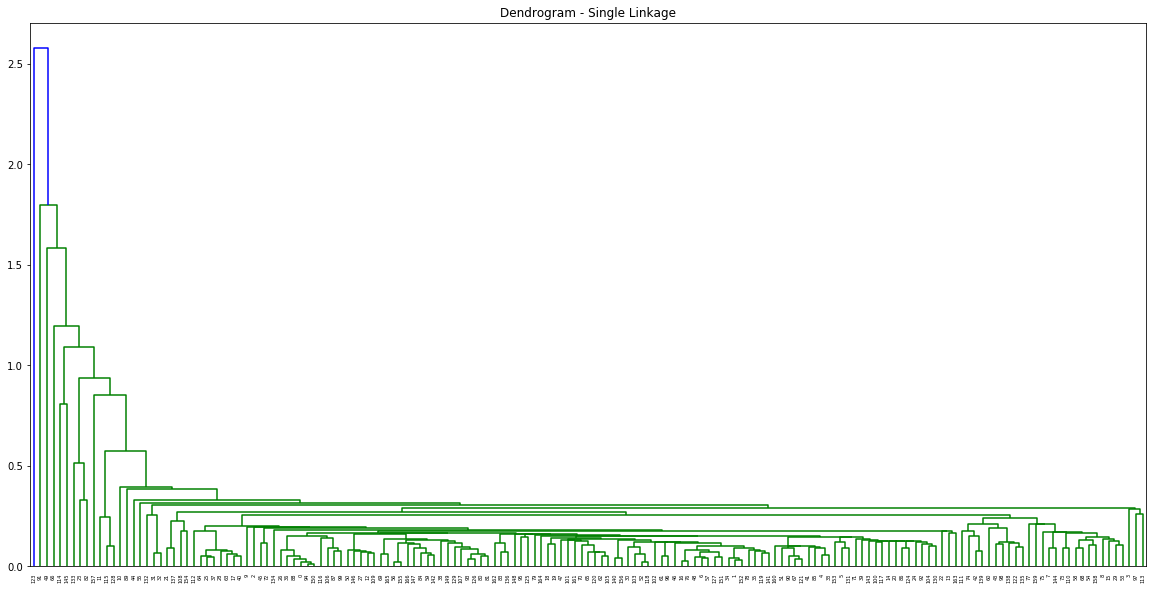

In [58]:
# single linkage
plt.figure(figsize=(20,10))
plt.title('Dendrogram - Single Linkage')
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)

plt.show()

### Complete linkage

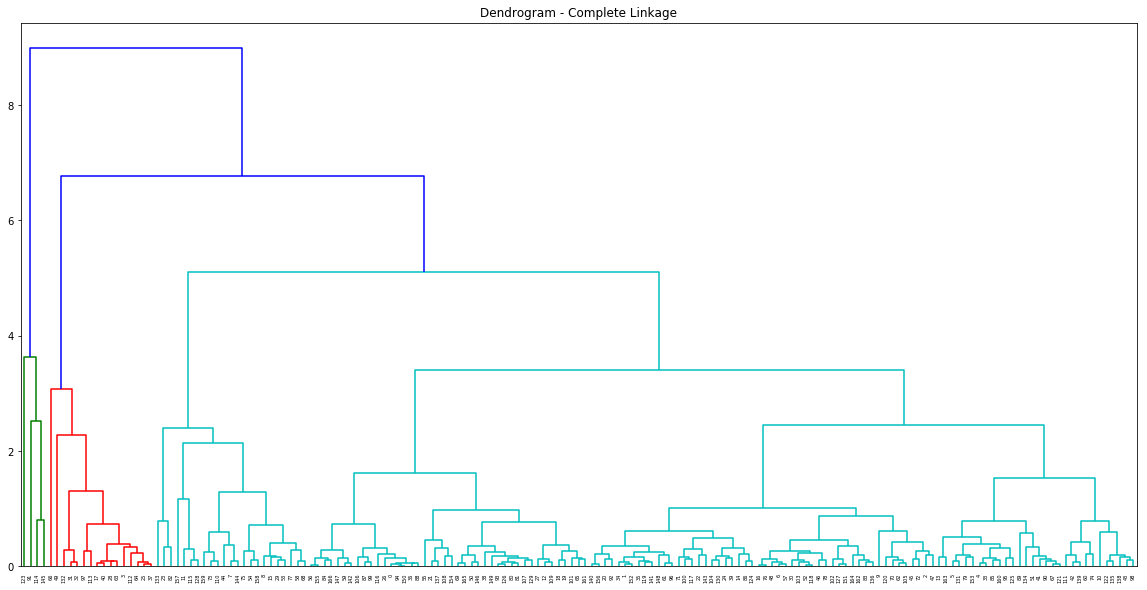

In [59]:
# complete linkage
plt.figure(figsize=(20,10))
plt.title('Dendrogram - Complete Linkage')
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [60]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
# assign cluster labels
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort', 'income','gdpp']
rfm_df_scaled.head()
rfm_df_scaled['cluster_labels'] = cluster_labels


In [62]:
rfm_df_scaled['country'] = df_raw['country']
rfm_df_scaled.groupby('cluster_labels').count()

,child_mort,income,gdpp,country
cluster_labels,,,,
0,147,147,147,147
1,16,16,16,16
2,4,4,4,4


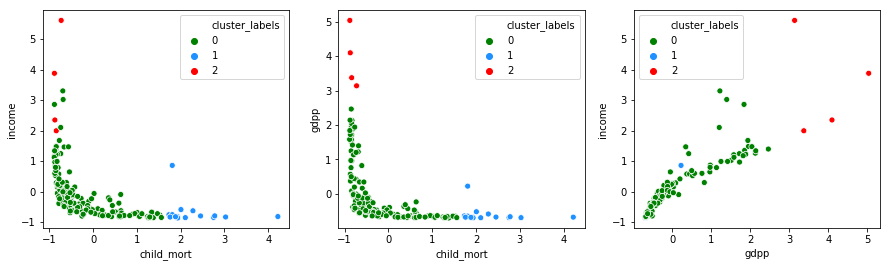

In [63]:
# Plot the Cluster with respect to the clusters obtained

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y ='income', hue = 'cluster_labels', palette=['green','dodgerblue','red'], legend='full', data = rfm_df_scaled)
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y ='gdpp', hue = 'cluster_labels', palette=['green','dodgerblue','red'], legend='full', data = rfm_df_scaled)
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y ='income', hue = 'cluster_labels', palette=['green','dodgerblue','red'], legend='full', data = rfm_df_scaled)


In [64]:
rfm_df_scaled[rfm_df_scaled['cluster_labels']==0].head(10)

,child_mort,income,gdpp,cluster_labels,country
0,1.291532,-0.808245,-0.679180,0,Afghanistan
1,-0.538949,-0.375369,-0.485623,0,Albania
2,-0.272833,-0.220844,-0.465376,0,Algeria
4,-0.695634,0.101732,-0.041817,0,Antigua and Barbuda
5,-0.591177,0.080920,-0.145791,0,Argentina
6,-0.501643,-0.543421,-0.533233,0,Armenia
7,-0.832423,1.261966,2.130699,0,Australia
8,-0.844858,1.355617,1.857082,0,Austria
9,0.023128,-0.059556,-0.389857,0,Azerbaijan
10,-0.608587,0.299440,0.822811,0,Bahamas


In [65]:
rfm_df_scaled[rfm_df_scaled['cluster_labels']==1].head(10)

,child_mort,income,gdpp,cluster_labels,country
3,2.007808,-0.585043,-0.516268,1,Angola
17,1.808842,-0.797319,-0.667961,1,Benin
25,1.933196,-0.817611,-0.677976,1,Burkina Faso
28,1.734230,-0.753616,-0.637754,1,Cameroon
31,2.753928,-0.845810,-0.685035,1,Central African Republic
32,2.778798,-0.791596,-0.660355,1,Chad
37,1.933196,-0.860326,-0.691164,1,"Congo, Dem. Rep."
40,1.808842,-0.752055,-0.642679,1,Cote d'Ivoire
49,1.808842,0.861347,0.226327,1,Equatorial Guinea
63,1.759101,-0.830097,-0.673981,1,Guinea


In [66]:
rfm_df_scaled[rfm_df_scaled['cluster_labels']==2]

,child_mort,income,gdpp,cluster_labels,country
91,-0.882164,3.878996,5.036507,2,Luxembourg
114,-0.872216,2.349360,4.095266,2,Norway
123,-0.727966,5.611542,3.137608,2,Qatar
145,-0.839884,1.995566,3.372918,2,Switzerland


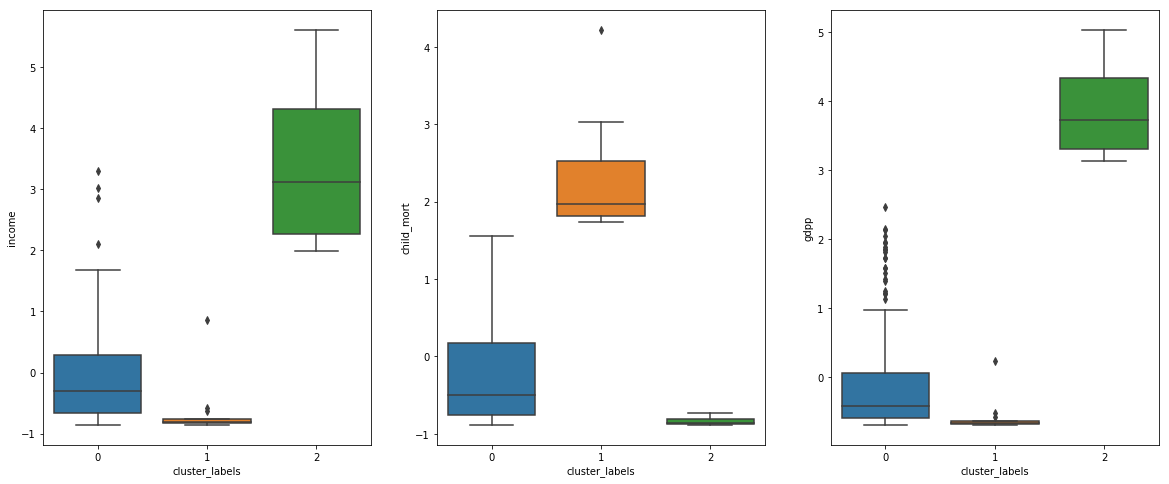

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='income', data=rfm_df_scaled)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='child_mort', data=rfm_df_scaled)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=rfm_df_scaled)

### Heirarchical Clustring - Suggestion
- Countries in Cluster 2 have good income,gdpp and low child mortality.
- Countries in Cluster 1 have income almost similar to Cluster 0 but with high child mortality.

- **In my analysis countries from Cluster 1 should be considered**

In [68]:
rfm_df_scaled[rfm_df_scaled['cluster_labels']==1]['country']

3                        Angola
17                        Benin
25                 Burkina Faso
28                     Cameroon
31     Central African Republic
32                         Chad
37             Congo, Dem. Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
63                       Guinea
64                Guinea-Bissau
66                        Haiti
97                         Mali
112                       Niger
113                     Nigeria
132                Sierra Leone
Name: country, dtype: object

### Merging the 2 results and analysing

In [69]:
# List of Countries which need Attention.

df_H = rfm_df_scaled[rfm_df_scaled['cluster_labels']==1]
df_H = df_H[['country', 'child_mort','income', 'gdpp']]
df_H.head(30)

,country,child_mort,income,gdpp
3,Angola,2.007808,-0.585043,-0.516268
17,Benin,1.808842,-0.797319,-0.667961
25,Burkina Faso,1.933196,-0.817611,-0.677976
28,Cameroon,1.734230,-0.753616,-0.637754
31,Central African Republic,2.753928,-0.845810,-0.685035
32,Chad,2.778798,-0.791596,-0.660355
37,"Congo, Dem. Rep.",1.933196,-0.860326,-0.691164
40,Cote d'Ivoire,1.808842,-0.752055,-0.642679
49,Equatorial Guinea,1.808842,0.861347,0.226327
63,Guinea,1.759101,-0.830097,-0.673981


In [70]:
# List of Countries which need Attention.

df_K = dat6[dat6['ClusterID']==2]
df_K = df_K[['country', 'child_mort','income', 'gdpp']]
df_K.head(30)

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
12,Botswana,52.5,13300,6350
17,Comoros,88.2,1410,769
18,Cote d'Ivoire,111.0,2690,1220
26,Eritrea,55.2,1420,482
30,Gabon,63.7,15400,8750
31,Gambia,80.3,1660,562
33,Ghana,74.7,3060,1310
37,Guinea,109.0,1190,648
38,Guinea-Bissau,114.0,1390,547


In [71]:
df_combined = pd.concat([df_K, df_H], join = 'inner' )
df_combined.head(20)

df_combined.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610.0,553.0
12,Botswana,52.5,13300.0,6350.0
17,Comoros,88.2,1410.0,769.0
18,Cote d'Ivoire,111.0,2690.0,1220.0
26,Eritrea,55.2,1420.0,482.0


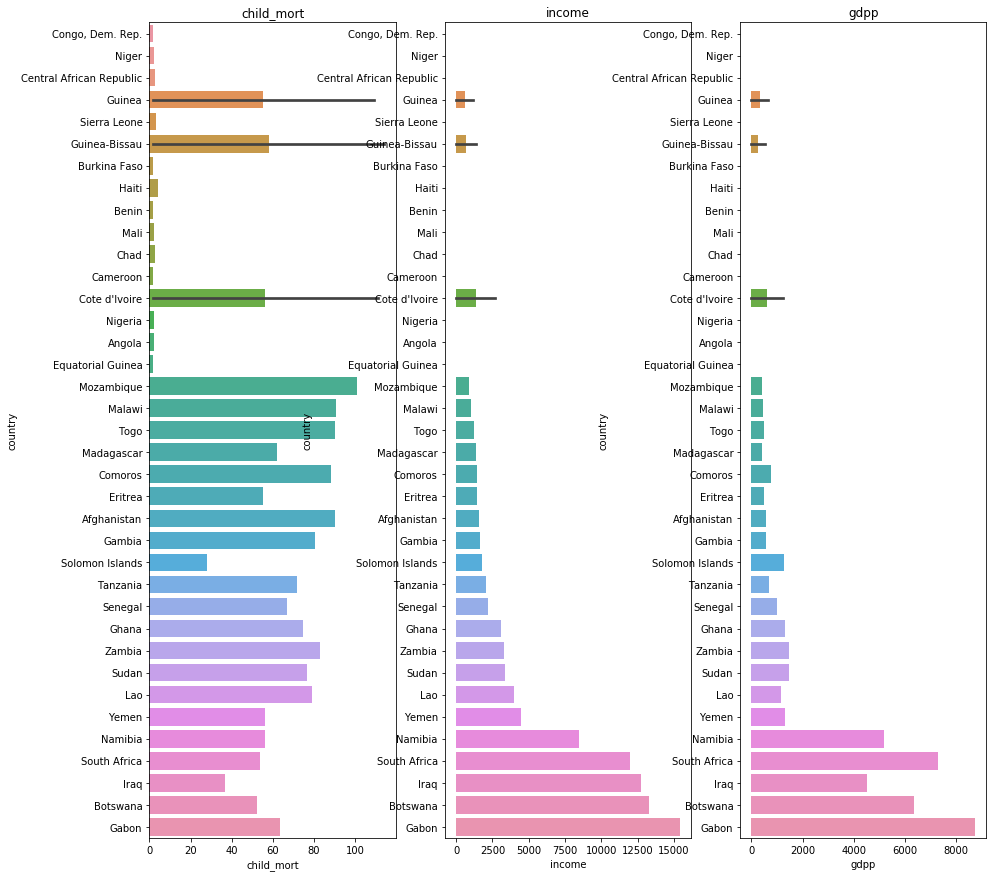

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('child_mort')
sns.barplot(x="child_mort", y="country", data=df_combined.sort_values(by=['income'], ascending = True))

plt.subplot(1,3,2)
plt.title('income')
sns.barplot(x="income", y="country", data=df_combined.sort_values(by=['income'], ascending = True))

plt.subplot(1,3,3)
plt.title('gdpp')
sns.barplot(x="gdpp", y="country", data=df_combined.sort_values(by=['income'], ascending = True))


 **From the above Graph Countries which need Attention**
- Child Mortality : Mozambique, Malawi, Togo, Guinea, Comoros
- Income: Congo, Dem. Rep.,Niger, Central African Republic, Sierra Leone, Burkina Faso, Haiti
- GDPP: Congo, Dem. Rep.,Niger, Central African Republic, Sierra Leone, Burkina Faso, Haiti

In [73]:
# Bottom 20 Countries which need help
df_combined.sort_values(by=['income'], ascending = True)[:20]['country']

37             Congo, Dem. Rep.
112                       Niger
31     Central African Republic
63                       Guinea
132                Sierra Leone
64                Guinea-Bissau
25                 Burkina Faso
66                        Haiti
17                        Benin
97                         Mali
32                         Chad
28                     Cameroon
40                Cote d'Ivoire
113                     Nigeria
3                        Angola
49            Equatorial Guinea
62                   Mozambique
57                       Malawi
37                       Guinea
85                         Togo
Name: country, dtype: object

`End Of Assignment`